### Trading Strategy based on short term momnetum and trailing stop loss

In [1]:
import yfinance as yf
data= yf.download("^NSEI",start="2023-01-01" , interval="1h")
data['smaSlow']=data['Close'].rolling(window=50).mean()
data['smaFast']=data['Close'].rolling(window=10).mean()
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,smaSlow,smaFast
Datetime,,,,,,,,
2023-01-02 09:15:00+05:30,18131.699219,18172.949219,18087.550781,18162.900391,18162.900391,0,NaN,NaN
2023-01-02 10:15:00+05:30,18159.400391,18199.300781,18155.400391,18186.500000,18186.500000,0,NaN,NaN
2023-01-02 11:15:00+05:30,18186.099609,18192.949219,18170.500000,18192.050781,18192.050781,0,NaN,NaN
2023-01-02 12:15:00+05:30,18190.650391,18197.300781,18153.900391,18182.349609,18182.349609,0,NaN,NaN
2023-01-02 13:15:00+05:30,18182.250000,18193.449219,18157.949219,18170.099609,18170.099609,0,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-28 11:15:00+05:30,24147.599609,24150.500000,24103.699219,24110.900391,24110.900391,0,23686.861914,24026.304883
2024-06-28 12:15:00+05:30,24111.750000,24115.000000,24009.349609,24060.750000,24060.750000,0,23696.949922,24037.784961
2024-06-28 13:15:00+05:30,24060.949219,24135.449219,24044.800781,24117.199219,24117.199219,0,23708.251914,24057.304883


In [2]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data['smaFast'], name='fastMA', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data.index, y=data['smaSlow'], name='slowMA', line=dict(color='black')))
# Update layout
fig.update_layout(title='Moving Averages and Exponential Moving Average',
                  xaxis_title='Date',
                  yaxis_title='Price')

# # Show the plot
# fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue'},
              'name': 'Close',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 2, 9, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2023, 1, 2, 10, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2023, 1, 2, 11, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          ...,
                          datetime.datetime(2024, 6, 28, 13, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 6, 28, 14, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 6, 28, 15, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)],
                         dtype=object),
              'y': array([18162.90039062, 18186.5       , 18192.05078125, ..., 24117.19921875,
                          23989.19921875, 24010.59960938])},
             {'line': {'color': 'red'},
              'name': 'fastMA',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 2, 9, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2023, 1, 2, 10, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2023, 1, 2, 11, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          ...,
                          datetime.datetime(2024, 6, 28, 13, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 6, 28, 14, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 6, 28, 15, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)],
                         dtype=object),
              'y': array([           nan,            nan,            nan, ..., 24057.30488281,
                          24055.68984375, 24060.56484375])},
             {'line': {'color': 'black'},
              'name': 'slowMA',
              'type': 'scatter',
              'x': array([datetime.datetime(2023, 1, 2, 9, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2023, 1, 2, 10, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2023, 1, 2, 11, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          ...,
                          datetime.datetime(2024, 6, 28, 13, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 6, 28, 14, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>),
                          datetime.datetime(2024, 6, 28, 15, 15, tzinfo=<DstTzInfo 'Asia/Kolkata' IST+5:30:00 STD>)],
                         dtype=object),
              'y': array([           nan,            nan,            nan, ..., 23708.25191406,
                          23716.82289063, 23726.81488281])}],
    'layout': {'template': '...',
               'title': {'text': 'Moving Averages and Exponential Moving Average'},
               'xaxis': {'title': {'text': 'Date'}},
               'yaxis': {'title': {'text': 'Price'}}}
})

### SIMPLE MOMENTUM STRATEGY

In [3]:
df=data[['Open','High','Low','Close','Volume']]
df['price'] = df['Open'].shift(-1)
df

C:\Users\arunj\AppData\Local\Temp\ipykernel_3416\3409120072.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,price
Datetime,,,,,,
2023-01-02 09:15:00+05:30,18131.699219,18172.949219,18087.550781,18162.900391,0,18159.400391
2023-01-02 10:15:00+05:30,18159.400391,18199.300781,18155.400391,18186.500000,0,18186.099609
2023-01-02 11:15:00+05:30,18186.099609,18192.949219,18170.500000,18192.050781,0,18190.650391
2023-01-02 12:15:00+05:30,18190.650391,18197.300781,18153.900391,18182.349609,0,18182.250000
2023-01-02 13:15:00+05:30,18182.250000,18193.449219,18157.949219,18170.099609,0,18169.949219
...,...,...,...,...,...,...
2024-06-28 11:15:00+05:30,24147.599609,24150.500000,24103.699219,24110.900391,0,24111.750000
2024-06-28 12:15:00+05:30,24111.750000,24115.000000,24009.349609,24060.750000,0,24060.949219
2024-06-28 13:15:00+05:30,24060.949219,24135.449219,24044.800781,24117.199219,0,24117.050781


In [4]:
df['ret']=df.Close.pct_change()
df

C:\Users\arunj\AppData\Local\Temp\ipykernel_3416\814087562.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,price,ret
Datetime,,,,,,,
2023-01-02 09:15:00+05:30,18131.699219,18172.949219,18087.550781,18162.900391,0,18159.400391,NaN
2023-01-02 10:15:00+05:30,18159.400391,18199.300781,18155.400391,18186.500000,0,18186.099609,0.001299
2023-01-02 11:15:00+05:30,18186.099609,18192.949219,18170.500000,18192.050781,0,18190.650391,0.000305
2023-01-02 12:15:00+05:30,18190.650391,18197.300781,18153.900391,18182.349609,0,18182.250000,-0.000533
2023-01-02 13:15:00+05:30,18182.250000,18193.449219,18157.949219,18170.099609,0,18169.949219,-0.000674
...,...,...,...,...,...,...,...
2024-06-28 11:15:00+05:30,24147.599609,24150.500000,24103.699219,24110.900391,0,24111.750000,-0.001528
2024-06-28 12:15:00+05:30,24111.750000,24115.000000,24009.349609,24060.750000,0,24060.949219,-0.002080
2024-06-28 13:15:00+05:30,24060.949219,24135.449219,24044.800781,24117.199219,0,24117.050781,0.002346


In [5]:
df.dropna(inplace=True)
df['ret'].mean()

C:\Users\arunj\AppData\Local\Temp\ipykernel_3416\958575837.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.000112586139514353

In [6]:
daily_return = df['Close'].pct_change().resample('M').agg(lambda x : (x+1).prod()-1)*100
daily_return    

Datetime
2023-01-31 00:00:00+05:30   -2.771007
2023-02-28 00:00:00+05:30   -2.066170
2023-03-31 00:00:00+05:30    0.228965
2023-04-30 00:00:00+05:30    3.990938
2023-05-31 00:00:00+05:30    2.613638
2023-06-30 00:00:00+05:30    3.573715
2023-07-31 00:00:00+05:30    2.906454
2023-08-31 00:00:00+05:30   -2.336280
2023-09-30 00:00:00+05:30    1.860253
2023-10-31 00:00:00+05:30   -2.809058
2023-11-30 00:00:00+05:30    5.452260
2023-12-31 00:00:00+05:30    7.954915
2024-01-31 00:00:00+05:30   -0.092046
2024-02-29 00:00:00+05:30    1.537430
2024-03-31 00:00:00+05:30    1.365793
2024-04-30 00:00:00+05:30    1.094971
2024-05-31 00:00:00+05:30   -0.176205
2024-06-30 00:00:00+05:30    6.391934
Freq: M, Name: Close, dtype: float64

In [7]:
df.tail(10)

,Open,High,Low,Close,Volume,price,ret
Datetime,,,,,,,
2024-06-27 12:15:00+05:30,24006.400391,24036.599609,23941.500000,23961.849609,0,23961.849609,-0.001812
2024-06-27 13:15:00+05:30,23961.849609,23995.349609,23929.949219,23954.349609,0,23955.349609,-0.000313
2024-06-27 14:15:00+05:30,23955.349609,24047.199219,23913.650391,24045.599609,0,24045.400391,0.003809
2024-06-27 15:15:00+05:30,24045.400391,24086.349609,24036.099609,24036.099609,0,24085.849609,-0.000395
2024-06-28 09:15:00+05:30,24085.849609,24172.449219,24064.150391,24133.150391,0,24134.050781,0.004038
2024-06-28 10:15:00+05:30,24134.050781,24151.250000,24105.150391,24147.800781,0,24147.599609,0.000607
2024-06-28 11:15:00+05:30,24147.599609,24150.500000,24103.699219,24110.900391,0,24111.750000,-0.001528
2024-06-28 12:15:00+05:30,24111.750000,24115.000000,24009.349609,24060.750000,0,24060.949219,-0.002080
2024-06-28 13:15:00+05:30,24060.949219,24135.449219,24044.800781,24117.199219,0,24117.050781,0.002346


In [8]:
profits = []
in_position = False

for index,row in df.iterrows():
    if not in_position and row.ret >0.002:
        buyprice = row.price
        in_position=True 
        trailing_stop = buyprice*0.98
    if in_position:
        #ammend stoploss if closing price is moving upward
        if row.Close * 0.98 >= trailing_stop:
            trailing_stop = row.Close*0.98
        if row.Close <= trailing_stop:
            sellprice = row.price
            profit = (sellprice-buyprice)/buyprice #commission is included
            profits.append(profit)
            in_position =False

In [9]:
profits

[-0.021754938801844332,
 -0.0033300434705464867,
 0.004142476342411882,
 0.0009582159401722563,
 -0.022924159954526967,
 0.05998532294109027,
 0.07791360717201566,
 -0.014823651767776008,
 -0.004703624797908828,
 0.02382172131147541,
 -0.019827786335829,
 -0.0005657170448476407,
 0.09701231871900724,
 0.020048096238803534,
 0.006032307824336432,
 0.01447121844847782,
 0.008472025776820514,
 0.0009267038844082181,
 -0.019530855903291695,
 0.025999649826196715,
 0.011715669250022523]

<Axes: >

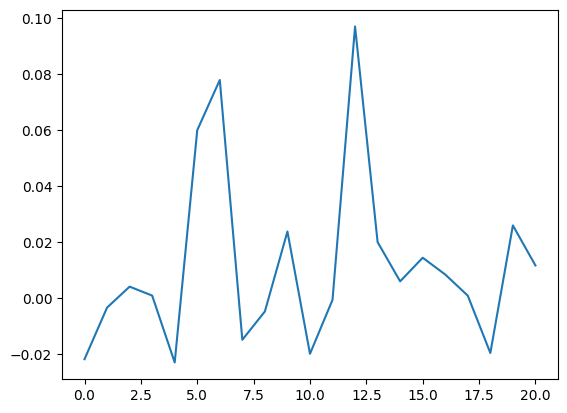

In [10]:
import pandas as pd
pd.Series(profits).plot()

<Axes: xlabel='Datetime'>

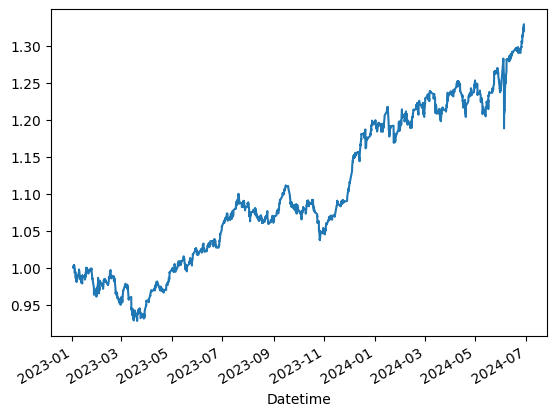

In [11]:
(df.ret+1).cumprod().plot()

<Axes: >

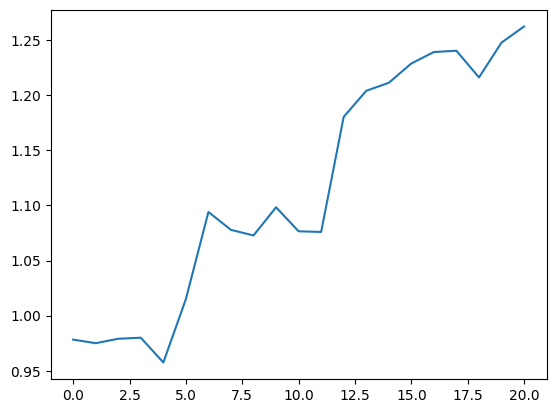

In [12]:
#Cummulative return
(pd.Series(profits)+1).cumprod().plot()

### Trying out the Strategy on a bigger dataset -https://www.kaggle.com/datasets/debashis74017/nifty-50-minute-data/code

In [26]:
df=pd.read_csv(r'D:\backtest_ursell\NIFTY 50 - Minute data.csv')

In [27]:
df.head()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


In [28]:
df.set_index(df.date,inplace=True)
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [29]:
df.index=pd.to_datetime(df.index)

df=df[['open','high','low','close']]

df.rename(columns={df.columns[0]:"Open",df.columns[1]:"High",df.columns[2]:"Low",df.columns[3]:"Close"},inplace=True)

In [31]:
df['price'] = df['Open'].shift(-1)
df['ret']=df.Close.pct_change()
df.dropna(inplace=True)
df

,Open,High,Low,Close,price,ret
date,,,,,,
2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,8287.40,-0.000476
2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,8294.25,0.000694
2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,8300.60,0.000814
2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,8300.50,0.000066
2015-01-09 09:20:00,8300.50,8303.00,8298.60,8300.00,8300.65,-0.000145
...,...,...,...,...,...,...
2024-01-25 15:24:00,21364.90,21380.35,21363.20,21378.20,21376.55,0.000482
2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,21376.55,-0.000012
2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,21384.75,0.000292


In [32]:
(df.ret+1).cumprod()

date
2015-01-09 09:16:00    0.999524
2015-01-09 09:17:00    1.000217
2015-01-09 09:18:00    1.001031
2015-01-09 09:19:00    1.001097
2015-01-09 09:20:00    1.000953
                         ...   
2024-01-25 15:24:00    2.578141
2024-01-25 15:25:00    2.578110
2024-01-25 15:26:00    2.578864
2024-01-25 15:27:00    2.580064
2024-01-25 15:28:00    2.580251
Name: ret, Length: 836755, dtype: float64

## Function

In [33]:
def trail(df,entry,dist):
    profits = []
    in_position = False

    for index,row in df.iterrows():
        if not in_position and row.ret > entry:
            buyprice = row.price
            in_position=True 
            trailing_stop = buyprice * dist
        if in_position:
            #ammend stoploss if closing price is moving upward
            if row.Close * dist >= trailing_stop:
                trailing_stop = row.Close * dist
            if row.Close <= trailing_stop:
                sellprice = row.price
                profit = (sellprice-buyprice)/buyprice - 0.002
                profits.append(profit)
                in_position =False
    return (pd.Series(profits)+1).cumprod()

In [34]:
trail(df,.002,.98)

0      1.065490
1      1.043867
2      1.066622
3      1.058997
4      1.073951
         ...   
295    1.903570
296    1.862369
297    2.074836
298    2.128690
299    2.112263
Length: 300, dtype: float64

In [35]:
df.reset_index(inplace=True)
df

,date,Open,High,Low,Close,price,ret
0,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,8287.40,-0.000476
1,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,8294.25,0.000694
2,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,8300.60,0.000814
3,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,8300.50,0.000066
4,2015-01-09 09:20:00,8300.50,8303.00,8298.60,8300.00,8300.65,-0.000145
...,...,...,...,...,...,...,...
836750,2024-01-25 15:24:00,21364.90,21380.35,21363.20,21378.20,21376.55,0.000482
836751,2024-01-25 15:25:00,21376.55,21378.90,21372.75,21377.95,21376.55,-0.000012
836752,2024-01-25 15:26:00,21376.55,21386.10,21375.80,21384.20,21384.75,0.000292
836753,2024-01-25 15:27:00,21384.75,21401.75,21381.30,21394.15,21392.70,0.000465


### To get markers for buy and sell Action- create a dataframe

In [38]:
def trail(df,entry,dist):
    trades_df = pd.DataFrame(columns=['Date', 'Price', 'Action'])
    cumulative_profit = 0
    winning_trades = 0
    total_trades = 0
    profits = []
    in_position = False

    for index,row in df.iterrows():
        if not in_position and row.ret > entry:
            buyprice = row.price
            in_position=True 
            trailing_stop = buyprice * dist
            trades_df = trades_df.append({'Date': row.Datetime,'Price': buyprice, 'Action': 'Buy'}, ignore_index=True)
        if in_position:
            #ammend stoploss if closing price is moving upward
            if row.Close * dist >= trailing_stop:
                trailing_stop = row.Close * dist
            if row.Close <= trailing_stop:
                sellprice = row.price
                profit = (sellprice-buyprice)/buyprice 
                profits.append(profit)
                in_position =False
                cumulative_profit += profit
                total_trades += 1
                if profit > 0:
                    winning_trades += 1
                trades_df = trades_df.append({'Date': row.Datetime,'Price': sellprice, 'Action': 'Sell'}, ignore_index=True)
    return trades_df
trail(df,.001,.98)

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:30: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\arunj\AppData\Local\Temp\ipykernel_66680\2825964738.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,Date,Price,Action
0,2024-01-01 10:15:00+05:30,21740.949219,Buy
1,2024-01-17 11:15:00+05:30,21674.900391,Sell
2,2024-01-17 13:15:00+05:30,21657.900391,Buy
3,2024-02-12 12:15:00+05:30,21613.849609,Sell
4,2024-02-12 13:15:00+05:30,21687.849609,Buy
5,2024-03-13 13:15:00+05:30,22001.699219,Sell
6,2024-03-14 09:15:00+05:30,22011.150391,Buy
7,2024-04-15 14:15:00+05:30,22271.500000,Sell
8,2024-04-16 13:15:00+05:30,22142.650391,Buy


In [37]:
import io
import requests

url = "https://raw.githubusercontent.com/Rigava/DataRepo/main/yesbank.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print(df.dtypes) 

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
